# Heart Wave
-----
`NAME: V NAGASAI, ROLL: CS20B1016`

-----
Generating heart wave in python using sin function 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

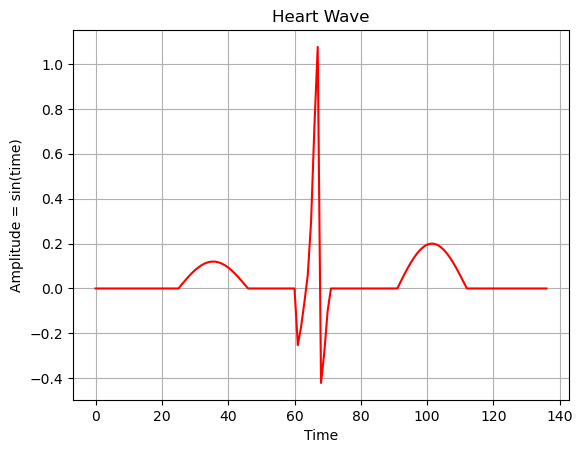

In [2]:
Base = np.array([0]*25)
P = 0.12*np.sin(np.arange(0, 3.15, 0.15))
PR_segment = np.array([0]*15)
Q = 0.3*np.sin(np.arange(-1, 0.2001, 0.4))
R = 1.5*np.sin(np.arange(0.20001, 1, 0.3))
S = 0.5*np.sin(np.arange(-1, 0.2, 0.4))
ST_segment = np.array([0]*20)
T = 0.2*np.sin(np.arange(0, 3.15, 0.15))
waves = [Base, P, PR_segment, Q, R, S,ST_segment, T, Base]
Heart_wave = np.array([])
for wave in waves:
	Heart_wave = np.append(Heart_wave, wave)
plt.plot(Heart_wave, 'r')
plt.title("Heart Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude = sin(time)")
plt.grid()
plt.show()
